[View in Colaboratory](https://colab.research.google.com/github/apercky/cordova-hot-code-push/blob/master/NG_Analysis.ipynb)

In [0]:
!pip install quandl
!pip install intrinio
#!pip install talos

In [2]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib


--2018-10-27 14:32:06--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 216.105.38.13
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|216.105.38.13|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2018-10-27 14:32:07--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 216.105.38.13
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: https://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2018-10-27 14:32:07--  https://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving cfhcable.dl.so

In [0]:
import talib

# New Section

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from math import sqrt
from subprocess import check_output
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import keras
from sklearn.model_selection import  train_test_split
import time #helper libraries
from sklearn.preprocessing import MinMaxScaler, RobustScaler
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
from numpy import newaxis

Using TensorFlow backend.


In [0]:
import quandl
import pandas as pd
import altair as alt

# Load data from Quandl

In [6]:
quandl.ApiConfig.api_key = "NZxK92idzcccFwFTVgnz"
symbol = "CHRIS/CME_NG1"

data = quandl.get(symbol, start_date='2008-01-01', end_date='2018-10-10', order="asc")
data = data.rename(columns={'Last': 'Close'})

data.shape

(2700, 8)

In [127]:
data.head()

,Open,High,Low,Close,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
2008-01-02,7.572,7.875,7.564,7.850,NaN,7.850,27299.0,113865.0
2008-01-03,7.873,7.980,7.610,7.674,NaN,7.674,68553.0,106692.0
2008-01-04,7.652,7.859,7.500,7.841,NaN,7.841,72742.0,103564.0
2008-01-07,7.803,7.940,7.701,7.879,NaN,7.879,61496.0,101413.0
2008-01-08,7.909,8.000,7.880,7.967,NaN,7.967,56675.0,96218.0


In [0]:
data[:]['Close'].plot()

In [0]:
chartData = data.reset_index(level=0, inplace=False)
alt.Chart(chartData).mark_line().encode(
  x='Date:T',
  y='Close:Q',
  color='Stock:N'
).interactive()

# Prepare all data
Load data from Quandl, calculate the principal indicators and combine all together.

## MACD indicator

In [7]:
# use TA-lib
ta_macd, ta_macdsignal, ta_macdhist = talib.MACD(data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

macd = pd.DataFrame(index=data.index,columns={'MACD'})
macd['MACD'] = ta_macdhist
macd.tail()

,MACD
Date,
2018-10-04,0.029500
2018-10-05,0.023931
2018-10-08,0.026894
2018-10-09,0.028414
2018-10-10,0.025185


In [0]:
plt.figure(figsize=(21,7))
plt.plot(macd,label='macd',color='red')
plt.title('MACD')
plt.legend(loc='upper left')
plt.show()

## Stochastic Oscillator

In [8]:
# use TA-lib
ta_slowk, ta_slowd = talib.STOCH(data['High'], data['Low'], data['Close'], fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)

stoch = pd.DataFrame(index=data.index,columns={'STOCH'})
stoch['STOCH'] = ta_slowk
stoch.tail()


,STOCH
Date,
2018-10-04,84.882326
2018-10-05,75.236972
2018-10-08,75.467336
2018-10-09,75.832591
2018-10-10,77.837838


In [0]:
plt.figure(figsize=(21,7))
plt.plot(stoch[-100:],label='Stochastics Oscillator',color='blue')
plt.title('Stochastics Oscillator')
plt.legend(loc='upper left')
plt.show()

## Average True Range indicator

In [9]:
real = talib.ATR(data['High'], data['Low'], data['Close'], timeperiod=14)

atr = pd.DataFrame(index=data.index,columns={'ATR'})
atr['ATR'] = ta_slowk
atr.tail()

,ATR
Date,
2018-10-04,84.882326
2018-10-05,75.236972
2018-10-08,75.467336
2018-10-09,75.832591
2018-10-10,77.837838


In [0]:
plt.figure(figsize=(21,7))
plt.plot(atr[-100:],label='ATR',color='green')
plt.title('Average True Range')
plt.legend(loc='upper left')
plt.show()

In [10]:
# combine all indicators
all_data = pd.concat([data, macd, stoch, atr], axis=1)
all_data.head()

,Open,High,Low,Close,Change,Settle,Volume,Previous Day Open Interest,MACD,STOCH,ATR
Date,,,,,,,,,,,
2008-01-02,7.572,7.875,7.564,7.850,NaN,7.850,27299.0,113865.0,NaN,NaN,NaN
2008-01-03,7.873,7.980,7.610,7.674,NaN,7.674,68553.0,106692.0,NaN,NaN,NaN
2008-01-04,7.652,7.859,7.500,7.841,NaN,7.841,72742.0,103564.0,NaN,NaN,NaN
2008-01-07,7.803,7.940,7.701,7.879,NaN,7.879,61496.0,101413.0,NaN,NaN,NaN
2008-01-08,7.909,8.000,7.880,7.967,NaN,7.967,56675.0,96218.0,NaN,NaN,NaN


# Data normalization

In [11]:
# data.shape

scaler = MinMaxScaler()

df = all_data.resample("1D") # since some data is monthly / weekly  
df = df.interpolate(method='linear') # Good practice?  
df.dropna(inplace=True)  
df['Open']  = scaler.fit_transform(df.Open.values.reshape(-1,1))
df['High']  = scaler.fit_transform(df.High.values.reshape(-1,1))
df['Low']   = scaler.fit_transform(df.Low.values.reshape(-1,1))
df['Close'] = scaler.fit_transform(df.Close.values.reshape(-1,1))
df['Volume'] = scaler.fit_transform(df.Volume.values.reshape(-1,1))
df['MACD'] = scaler.fit_transform(df.MACD.values.reshape(-1,1))
df['STOCH'] = scaler.fit_transform(df.STOCH.values.reshape(-1,1))
df['ATR'] = scaler.fit_transform(df.ATR.values.reshape(-1,1))

df.drop([
    'High',
    'Low',
    'Settle',
    'Previous Day Open Interest'
], axis=1, inplace=True)

df.dropna(inplace=True) 

# move Close column to end
col_close = df.pop('Close')
df['Close'] = col_close

df.tail()


,Open,Change,Volume,MACD,STOCH,ATR,Close
Date,,,,,,,
2018-10-06,0.333904,0.056,0.505239,0.659881,0.770258,0.770258,0.346026
2018-10-07,0.333405,0.090,0.531200,0.663772,0.771068,0.771068,0.355546
2018-10-08,0.332905,0.124,0.557161,0.667662,0.771878,0.771878,0.365065
2018-10-09,0.354086,0.001,0.654645,0.673653,0.775732,0.775732,0.370821
2018-10-10,0.359435,0.018,0.568261,0.660932,0.796892,0.796892,0.363737


In [0]:
#df.as_matrix()[:, -1]

def denormalize(df, normalized_value): 
    df = df['Close'].values.reshape(-1,1)
    normalized_value = normalized_value.reshape(-1,1)
    
    #return df.shape, p.shape
    min_max_scaler = MinMaxScaler()
    a = min_max_scaler.fit_transform(df)
    new = min_max_scaler.inverse_transform(normalized_value)
    return new


# Loading data

In [0]:
def load_data(stock, seq_len):
    amount_of_features = len(stock.columns)
    data = stock.as_matrix() 
    sequence_length = seq_len + 1 # index starting from 0
    result = []
    
    for index in range(len(data) - sequence_length): # maxmimum date = lastest date - sequence length
        result.append(data[index: index + sequence_length]) # index : index + 22days
    
    result = np.array(result)
    row = round(0.9 * result.shape[0]) # 90% split
    
    train = result[:int(row), :] # 90% date
    X_train = train[:, :-1] # all data until day m
    y_train = train[:, -1][:,-1] # day m + 1 adjusted close price
    
    X_test = result[int(row):, :-1]
    y_test = result[int(row):, -1][:,-1] 

    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], amount_of_features))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], amount_of_features))  

    return [X_train, y_train, X_test, y_test]
  
X_train, y_train, X_test, y_test = load_data(df, seq_len)

# Configure NN

In [0]:
# Configure TF
seq_len = 5 # 22
d = 0.3 # 0.3
shape = [7, seq_len, 1] # feature, window, output
neurons = [64, 256, 128, 1] # [128, 128, 32, 1] - [64, 256, 128, 1]
batch_size = 20 # 20
epochs = 1000 # 300

# Buidling Model

In [0]:
def build_model(layers, neurons, d):
    model = Sequential()
    
    model.add(LSTM(neurons[0], input_shape=(layers[1], layers[0]), return_sequences=True))
    model.add(Dropout(d))
        
    model.add(LSTM(neurons[1], input_shape=(layers[1], layers[0]), return_sequences=False))
    model.add(Dropout(d))
        
    model.add(Dense(neurons[2],kernel_initializer="uniform",activation='relu'))        
    model.add(Dense(neurons[3],kernel_initializer="uniform",activation='sigmoid'))
    #model.add(Dense(neurons[3],kernel_initializer="uniform",activation='linear'))
    # model = load_model('my_LSTM_stock_model1000.h5')
    adam = keras.optimizers.Adam(decay=0.2)
    
    model.compile(loss='mse',optimizer='adam', metrics=['accuracy'])
    # model.compile(loss='mean_squared_error', optimizer=adam, metrics=['accuracy'])
    model.summary()
    return model

# Model execution

In [119]:
model = build_model(shape, neurons, d)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_51 (LSTM)               (None, 5, 64)             18432     
_________________________________________________________________
dropout_51 (Dropout)         (None, 5, 64)             0         
_________________________________________________________________
lstm_52 (LSTM)               (None, 256)               328704    
_________________________________________________________________
dropout_52 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_52 (Dense)             (None, 1)                 129       
Total params: 380,161
Trainable params: 380,161
Non-trainable params: 0
_________________________________________________________________


##Model fitting

In [0]:
model.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.1,
    verbose=1)

# Result on training set and testing set

In [121]:
def model_score(model, X_train, y_train, X_test, y_test):
    trainScore = model.evaluate(X_train, y_train, verbose=0)
    print('Train Score: %.5f MSE (%.2f RMSE)' % (trainScore[0], sqrt(trainScore[0])))

    testScore = model.evaluate(X_test, y_test, verbose=0)
    print('Test Score: %.5f MSE (%.2f RMSE)' % (testScore[0], sqrt(testScore[0])))
    return trainScore[0], testScore[0]
  
model_score(model, X_train, y_train, X_test, y_test)

Train Score: 0.00008 MSE (0.01 RMSE)
Test Score: 0.00005 MSE (0.01 RMSE)


(8.215936850499237e-05, 5.3925410267130953e-05)

# Prediction vs Real results

In [0]:
def percentage_difference(model, X_test, y_test):
    percentage_diff=[]

    p = model.predict(X_test)
    for u in range(len(y_test)): # for each data index in test data
        pr = p[u][0] # pr = prediction on day u

        percentage_diff.append((pr-y_test[u]/pr)*100)
    return p
  
p = percentage_difference(model, X_test, y_test)

# Plot out prediction

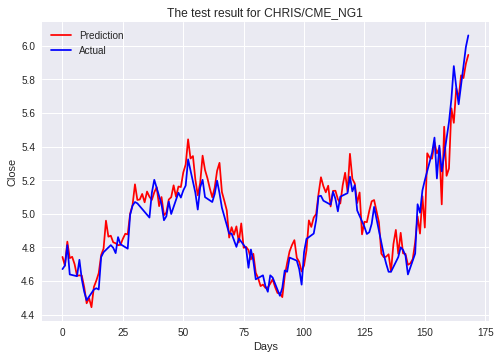

In [123]:
def denormalize(df, normalized_value):   
    df = df['Close'].values.reshape(-1,1)
    normalized_value = normalized_value.reshape(-1,1)
    
    #return df.shape, p.shape
    min_max_scaler = MinMaxScaler()
    a = min_max_scaler.fit_transform(df)
    new = min_max_scaler.inverse_transform(normalized_value)
    return new
  
def plot_result(df, normalized_value_p, normalized_value_y_test):
    newp = denormalize(df, normalized_value_p)
    newy_test = denormalize(df, normalized_value_y_test)
    plt2.plot(newp, color='red', label='Prediction')
    plt2.plot(newy_test,color='blue', label='Actual')
    plt2.legend(loc='best')
    plt2.title('The test result for {}'.format(symbol))
    plt2.xlabel('Days')
    plt2.ylabel('Close')
    plt2.show()
    
plot_result(all_data, p, y_test)

In [0]:
model.save('LSTM_Stock_prediction-20181018.h5')

# Function to load data, train model and see score

In [0]:
def quick_measure(df, seq_len, d, shape, neurons, epochs):
    X_train, y_train, X_test, y_test = load_data(df, seq_len)
    model = build_model(shape, neurons, d)
    model.fit(X_train, y_train, batch_size=512, epochs=epochs, validation_split=0.1, verbose=1)
    # model.save('LSTM_Stock_prediction-20170429.h5')
    trainScore, testScore = model_score(model, X_train, y_train, X_test, y_test)
    return trainScore, testScore

# Fine tune hyperparameter

In [0]:
dlist = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
neurons_LSTM = [16, 32, 64, 128, 256, 512]
dropout_result = {}

In [0]:
for d in dlist:    
    trainScore, testScore = quick_measure(df, seq_len, d, shape, neurons, epochs)
    dropout_result[d] = testScore

In [0]:

for n in neurons_LSTM:    
    nn = neurons = [64, 256, n, 1] 
    trainScore, testScore = quick_measure(df, seq_len, d, shape, nn, epochs)
    dropout_result[d] = testScore

In [0]:
min_val = min(dropout_result.values())
min_val_key = [k for k, v in dropout_result.items() if v == min_val]
print (dropout_result)
print (min_val_key)

In [0]:
lists = sorted(dropout_result.items())
x,y = zip(*lists)
plt.plot(x,y)
plt.title('Finding the best hyperparameter')
plt.xlabel('Dropout')
plt.ylabel('Mean Square Error')
plt.show()

In [0]:
seq_len = 22
shape = [7, seq_len, 1] # feature, window, output
neurons = [128, 128, 32, 1]
epochslist = [300,400,500]

epochs_result = {}

for epochs in epochslist:    
    trainScore, testScore = quick_measure(df, seq_len, d, shape, neurons, epochs)
    epochs_result[epochs] = testScore

In [0]:
def build_model3(layers, neurons, d, decay):
    model = Sequential()
    
    model.add(LSTM(neurons[0], input_shape=(layers[1], layers[0]), return_sequences=True))
    model.add(Dropout(d))
        
    model.add(LSTM(neurons[1], input_shape=(layers[1], layers[0]), return_sequences=False))
    model.add(Dropout(d))
        
    model.add(Dense(neurons[2],kernel_initializer="uniform",activation='relu'))        
    model.add(Dense(neurons[3],kernel_initializer="uniform",activation='sigmoid'))
    # model = load_model('my_LSTM_stock_model1000.h5')
    adam = keras.optimizers.Adam(decay=decay)
    model.compile(loss='mse',optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model

In [0]:
def quick_measure3(df, seq_len, d, shape, neurons, epochs, decay):
    X_train, y_train, X_test, y_test = load_data(df, seq_len)
    model = build_model3(shape, neurons, d, decay)
    model.fit(X_train, y_train, batch_size=20, epochs=epochs, validation_split=0.1, verbose=1)
    # model.save('LSTM_Stock_prediction-20170429.h5')
    trainScore, testScore = model_score(model, X_train, y_train, X_test, y_test)
    return trainScore, testScore

In [0]:
neurons = [64, 256, 128, 1]
epochs = 200
d = 0.3 #dropout
decay = 0.4

seq_len_list = [5, 10, 22, 60, 120]

seq_len_result = {}

for seq_len in seq_len_list:
    shape = [7, seq_len, 1]
    
    trainScore, testScore = quick_measure3(df, seq_len, d, shape, neurons, epochs, decay)
    seq_len_result[seq_len] = testScore

In [0]:
lists = sorted(seq_len_result.items())
x,y = zip(*lists)
plt.plot(x,y)
plt.title('Finding the best hyperparameter')
plt.xlabel('Days')
plt.ylabel('Mean Square Error')
plt.show()

In [43]:
neurons = [64, 256, 128, 1]
epochs = 200
seq_len = 4
d = 0.3 #dropout

decay_list = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]

decay_result = {}

for decay_item in decay_list:
    shape = [7, seq_len, 1]
    
    trainScore, testScore = quick_measure3(df, seq_len, d, shape, neurons, epochs, decay_item)
    decay_result[decay_item] = testScore

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_31 (LSTM)               (None, 4, 64)             18432     
_________________________________________________________________
dropout_31 (Dropout)         (None, 4, 64)             0         
_________________________________________________________________
lstm_32 (LSTM)               (None, 256)               328704    
_________________________________________________________________
dropout_32 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_32 (Dense)             (None, 1)                 129       
Total params: 380,161
Trainable params: 380,161
Non-trainable params: 0
_________________________________________________________________
Trai

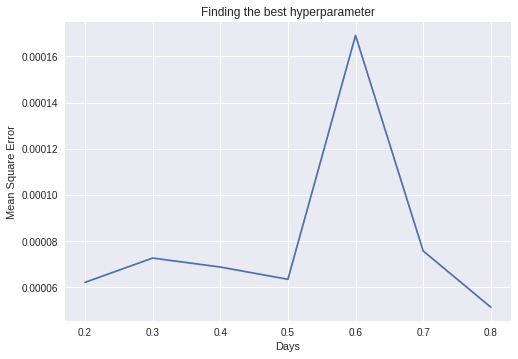

In [44]:
lists = sorted(decay_result.items())
x,y = zip(*lists)
plt.plot(x,y)
plt.title('Finding the best hyperparameter')
plt.xlabel('Days')
plt.ylabel('Mean Square Error')
plt.show()